In [ ]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_excel('/content/Order Insights.xlsx')
data.head()

,Order ID,Product Category,Product Title,Product Value,COD Amount,Purchase Price,Status
0,460859,Wireless Earbuds,Dany Airdots 101,2999,2999,2699,delivered
1,460860,Smart Watches,WearFit HK9 Pro Smart Watch,8149,8149,7850,returned
2,460861,Mobiles,Xiaomi Redmi Note 11,68499,0,67000,delivered
3,460862,Wireless Earbuds,M90 Pro TWS Gaming Earbuds,1349,1349,1050,delivered
4,460863,Mobiles,Samsung Galaxy A73,164999,164999,0,b2b_retailer


In [ ]:
data.describe()

,Order ID,Product Value,COD Amount,Purchase Price
count,104602.000000,104602.000000,1.046020e+05,104602.000000
mean,511827.596126,36577.781964,1.700259e+04,13346.848512
std,29511.249177,66532.029129,1.798823e+05,28123.718176
min,460859.000000,0.000000,-3.501280e+06,0.000000
25%,486227.250000,3199.000000,1.499000e+03,0.000000
50%,511814.500000,23999.000000,9.999000e+03,1050.000000
75%,537288.750000,45399.000000,4.356100e+04,19413.000000
max,563121.000000,695999.000000,8.175580e+05,652000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104602 entries, 0 to 104601
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          104602 non-null  int64 
 1   Product Category  104602 non-null  object
 2   Product Title     104602 non-null  object
 3   Product Value     104602 non-null  int64 
 4   COD Amount        104602 non-null  int64 
 5   Purchase Price    104602 non-null  int64 
 6   Status            104602 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.6+ MB


**Correlations & Covariance b/w Columns**

**Graphical Display to get the insigts of orders**

Extract the counts of each sub-category:

In [ ]:
total_status_counts = data['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)


Create a list of sub-category labels and their respective counts:

In [ ]:
categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(data), delivered_count, cancelled_count, returned_count]


Create a histogram using Matplotlib:

Text(0.5, 1.0, 'Histogram of Status Categories')

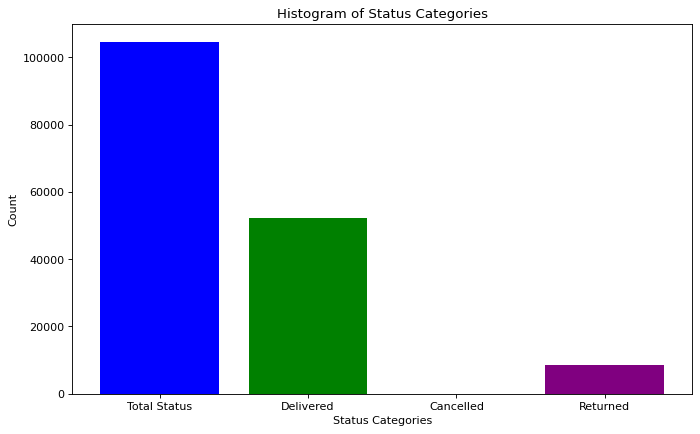

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Status Categories')
plt.ylabel('Count')
plt.title('Histogram of Status Categories')




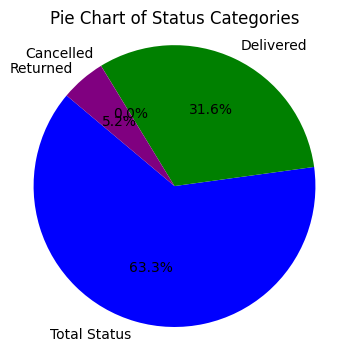

In [ ]:
# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['blue','green', 'red', 'purple'])
plt.title('Pie Chart of Status Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

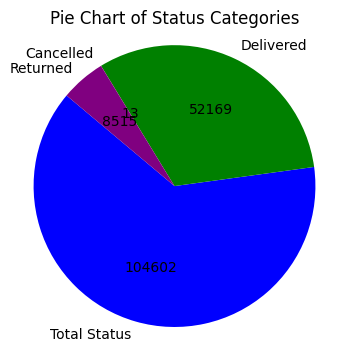

In [ ]:
# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart of Status Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Product Category Description**

In [ ]:
#data.head()

labels = data['Product Category']  # brand -- Pizza brand (class label)
classes = data['Product Category'].unique()
print(classes)
data['Product Category'].value_counts()

['Wireless Earbuds' 'Smart Watches' 'Mobiles' 'Laptops' 'Power Banks'
 'Tablets' 'Wall Chargers' 'Bluetooth Speakers' 'Charging Cables'
 'Car Chargers' 'Wireless Chargers']


Mobiles               58014
Wireless Earbuds      29753
Smart Watches         11735
Wall Chargers          1419
Power Banks            1414
Tablets                1062
Bluetooth Speakers      537
Charging Cables         436
Laptops                 150
Car Chargers             59
Wireless Chargers        23
Name: Product Category, dtype: int64

**Create Dataframes for Each Product Categories**

**Mobiles**

In [ ]:
#Mobiles = data[['Product Category'= 'Mobiles', 'Status']]
mobiles = data[data['Product Category'] == 'Mobiles']['Status']
mobiles['Status'] = data[data['Product Category'] == 'Mobiles']['Status']
mobiles



<ipython-input-21-772d5bfc7277>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobiles['Status'] = data[data['Product Category'] == 'Mobiles']['Status']


2                                                 delivered
4                                              b2b_retailer
7                                       cancelled_abandoned
8                                       cancelled_abandoned
9                                       cancelled_abandoned
                                ...                        
104597                                              pending
104598                                        await_payment
104599                                              pending
104601                                        await_payment
Status    2                   delivered
4               ...
Name: Status, Length: 58015, dtype: object

(-1.0999981719333352,
 1.0999997062776217,
 -1.0999991008611916,
 1.0999992730220538)

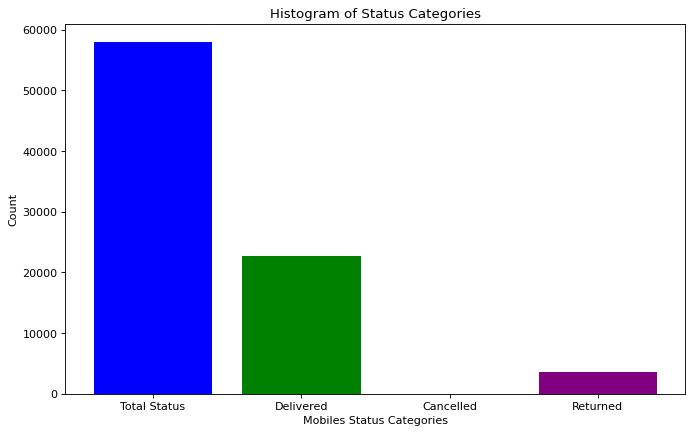

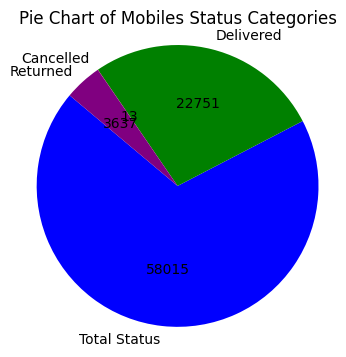

In [ ]:
total_status_counts = mobiles['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(mobiles), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Mobiles Status Categories')
plt.ylabel('Count')
plt.title('Histogram of Status Categories')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart of Mobiles Status Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Wireless Earbuds**

<ipython-input-48-fa432dc3e88c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wireless_earbirds['Status'] = data[data['Product Category'] == 'Wireless Earbuds']['Status']


(-1.099998830365001,
 1.099994645935074,
 -1.0999998852664912,
 1.0999990165949596)

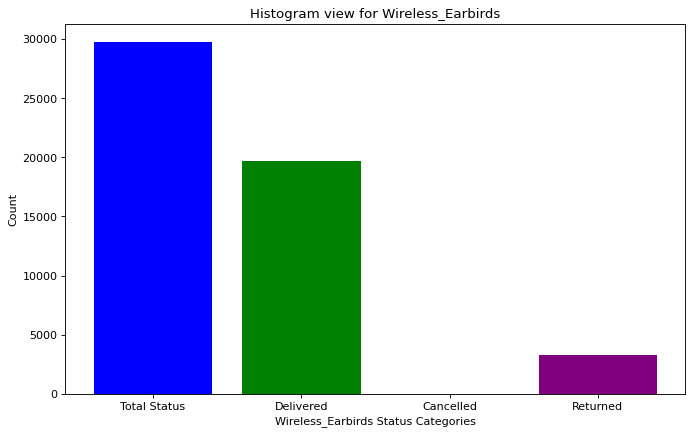

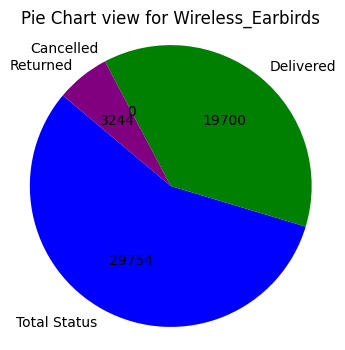

In [ ]:
#Mobiles = data[['Product Category'= 'Mobiles', 'Status']]
wireless_earbirds = data[data['Product Category'] == 'Wireless Earbuds']['Status']
wireless_earbirds['Status'] = data[data['Product Category'] == 'Wireless Earbuds']['Status']
#wireless_earbirds

total_status_counts = wireless_earbirds['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(wireless_earbirds), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Wireless_Earbirds Status Categories')
plt.ylabel('Count')
plt.title('Histogram view for Wireless_Earbirds')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart view for Wireless_Earbirds')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Smart Watches**

<ipython-input-47-fb2e60a4fc31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smart_watches['Status'] = data[data['Product Category'] == 'Smart Watches']['Status']


(-1.0999999422595, 1.0999998891231408, -1.0999998764074763, 1.0999992547853135)

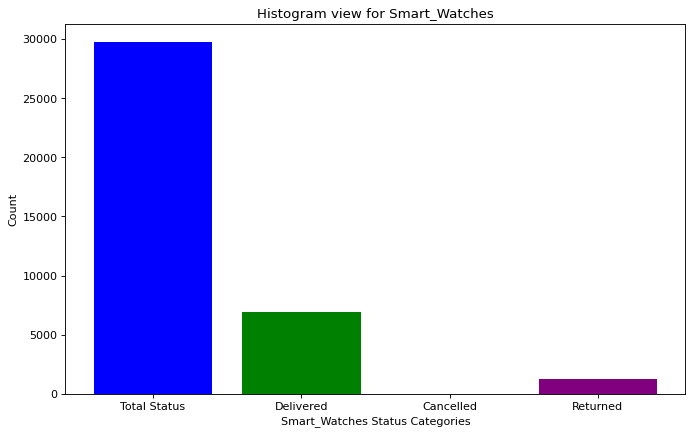

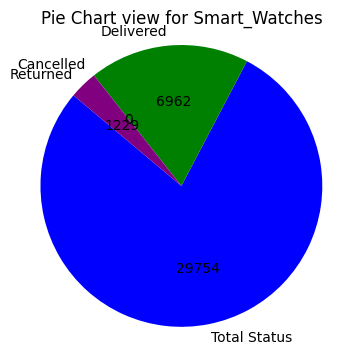

In [ ]:
#Mobiles = data[['Product Category'= 'Mobiles', 'Status']]
smart_watches = data[data['Product Category'] == 'Smart Watches']['Status']
smart_watches['Status'] = data[data['Product Category'] == 'Smart Watches']['Status']
#wireless_earbirds

total_status_counts = smart_watches['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(wireless_earbirds), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Smart_Watches Status Categories')
plt.ylabel('Count')
plt.title('Histogram view for Smart_Watches')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart view for Smart_Watches')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Wall Chargers**

<ipython-input-46-a89b762d4c14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wall_charges['Status'] = data[data['Product Category'] == 'Wall Chargers']['Status']


(-1.0999983082027258,
 1.0999995784972485,
 -1.0999985062793396,
 1.0999997829532797)

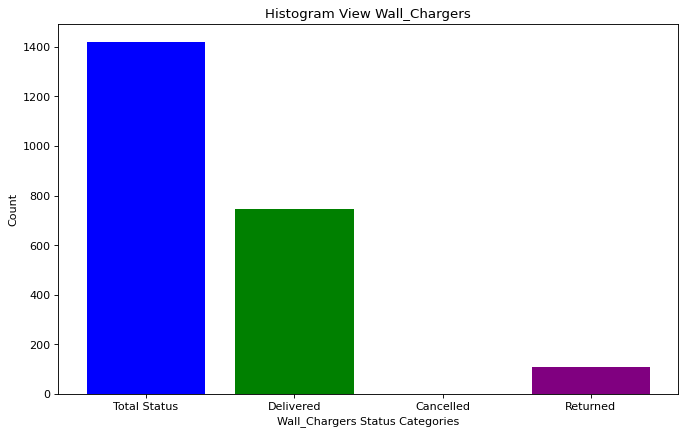

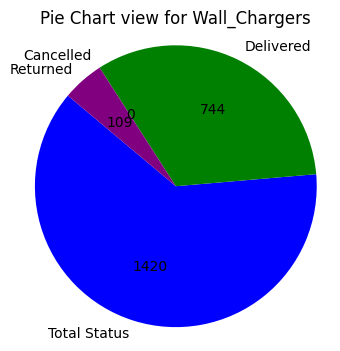

In [ ]:
#Mobiles = data[['Product Category'= 'Mobiles', 'Status']]
wall_charges = data[data['Product Category'] == 'Wall Chargers']['Status']
wall_charges['Status'] = data[data['Product Category'] == 'Wall Chargers']['Status']
#wireless_earbirds

total_status_counts = wall_charges['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(wall_charges), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Wall_Chargers Status Categories')
plt.ylabel('Count')
plt.title('Histogram View Wall_Chargers')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart view for Wall_Chargers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Power Banks**

<ipython-input-45-900e1c322395>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_banks['Status'] = data[data['Product Category'] == 'Power Banks']['Status']


(-1.0999987371512356,
 1.0999960085417297,
 -1.0999999793689321,
 1.0999995761029244)

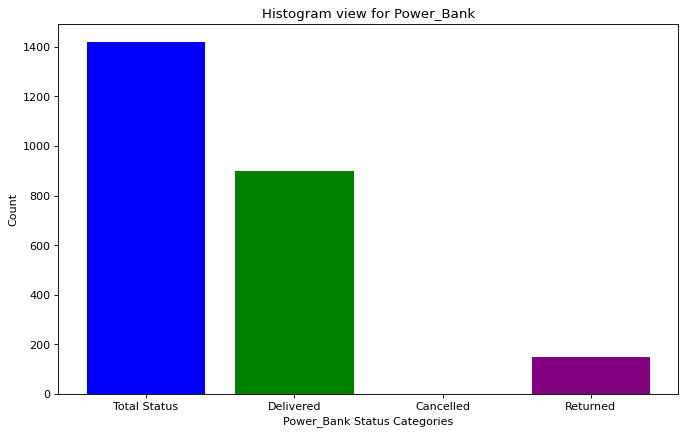

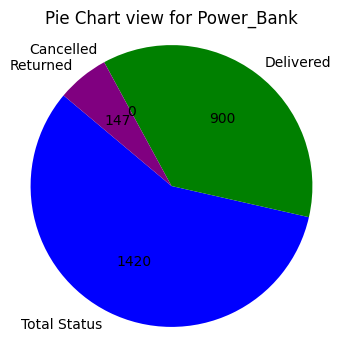

In [ ]:
#Mobiles = data[['Product Category'= 'Mobiles', 'Status']]
power_banks = data[data['Product Category'] == 'Power Banks']['Status']
power_banks['Status'] = data[data['Product Category'] == 'Power Banks']['Status']
#wireless_earbirds

total_status_counts = power_banks['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(wall_charges), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Power_Bank Status Categories')
plt.ylabel('Count')
plt.title('Histogram view for Power_Bank')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart view for Power_Bank')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Tablets**

<ipython-input-44-8ea20b227311>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tablets['Status'] = data[data['Product Category'] == 'Tablets']['Status']


(-1.0999980498106559,
 1.0999981598979134,
 -1.0999981442190987,
 1.0999989411844378)

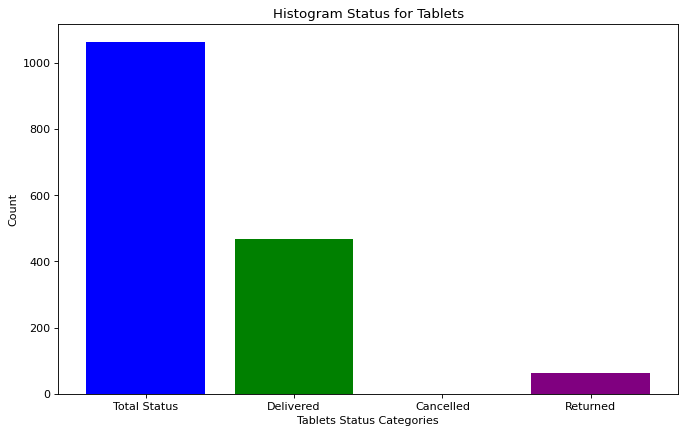

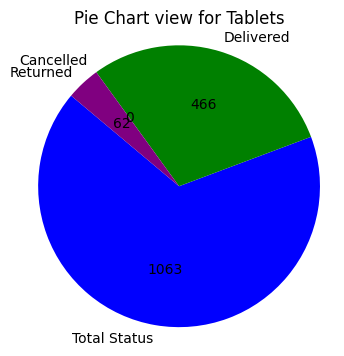

In [ ]:
#Mobiles = data[['Product Category'= 'Mobiles', 'Status']]
tablets = data[data['Product Category'] == 'Tablets']['Status']
tablets['Status'] = data[data['Product Category'] == 'Tablets']['Status']
#wireless_earbirds

total_status_counts = tablets['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(tablets), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Tablets Status Categories')
plt.ylabel('Count')
plt.title('Histogram Status for Tablets')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart view for Tablets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Bluetooth Speakers**

<ipython-input-43-fdf7414f3e05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bluetooth_speaker['Status'] = data[data['Product Category'] == 'Bluetooth Speakers']['Status']


(-1.0999985790329758,
 1.0999995904870996,
 -1.0999996963722574,
 1.0999999398896863)

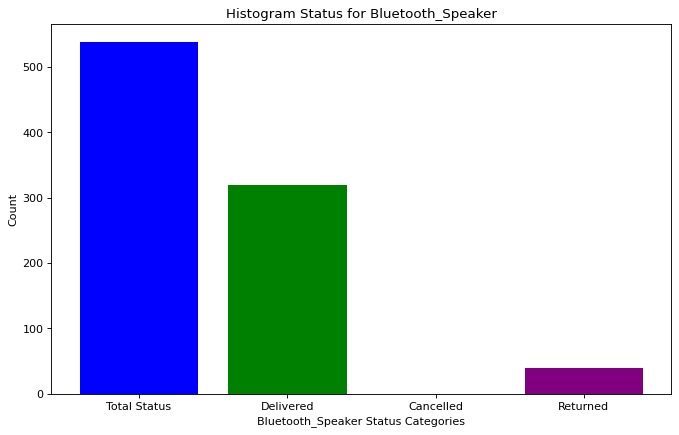

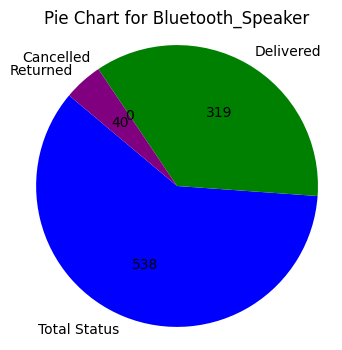

In [ ]:
#Mobiles = data[['Product Category'= 'Mobiles', 'Status']]
bluetooth_speaker = data[data['Product Category'] == 'Bluetooth Speakers']['Status']
bluetooth_speaker['Status'] = data[data['Product Category'] == 'Bluetooth Speakers']['Status']
#wireless_earbirds

total_status_counts = bluetooth_speaker['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(bluetooth_speaker), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Bluetooth_Speaker Status Categories')
plt.ylabel('Count')
plt.title('Histogram Status for Bluetooth_Speaker')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart for Bluetooth_Speaker')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Charging Cables**

<ipython-input-42-63ad8005d32d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_cables['Status'] = data[data['Product Category'] == 'Charging Cables']['Status']


(-1.0999985433733708,
 1.0999998289008133,
 -1.099999556646458,
 1.0999999788169268)

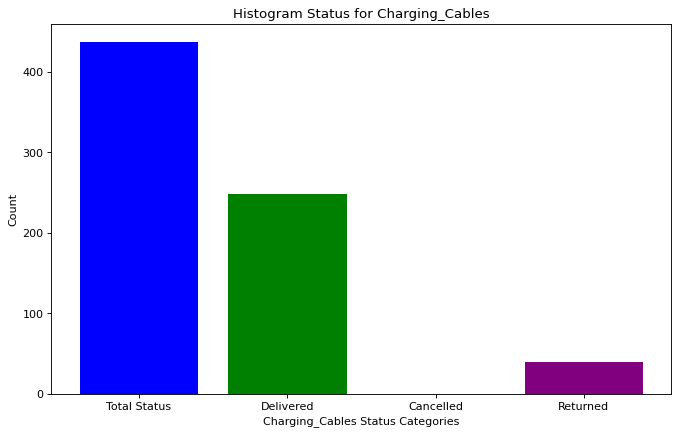

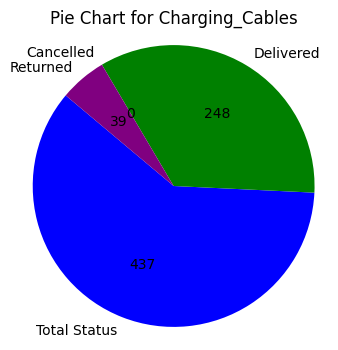

In [ ]:
charging_cables = data[data['Product Category'] == 'Charging Cables']['Status']
charging_cables['Status'] = data[data['Product Category'] == 'Charging Cables']['Status']
#wireless_earbirds

total_status_counts = charging_cables['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(charging_cables), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Charging_Cables Status Categories')
plt.ylabel('Count')
plt.title('Histogram Status for Charging_Cables')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart for Charging_Cables')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Laptops**

<ipython-input-41-c4253b77e691>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops['Status'] = data[data['Product Category'] == 'Laptops']['Status']


(-1.09999998210872, 1.099999878418886, -1.0999999505993454, 1.0999991815107268)

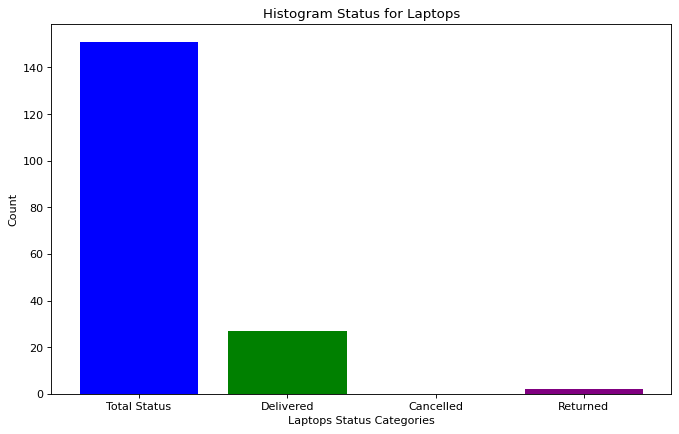

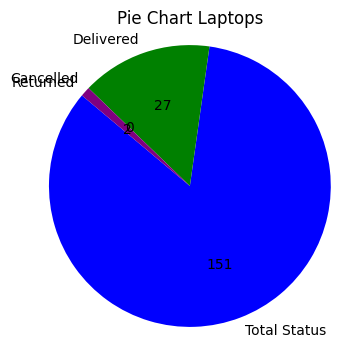

In [ ]:
laptops = data[data['Product Category'] == 'Laptops']['Status']
laptops['Status'] = data[data['Product Category'] == 'Laptops']['Status']
#wireless_earbirds

total_status_counts = laptops['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(laptops), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Laptops Status Categories')
plt.ylabel('Count')
plt.title('Histogram Status for Laptops')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart Laptops')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Car Chargers**

<ipython-input-40-d6f5b0e33971>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_chargers['Status'] = data[data['Product Category'] == 'Car Chargers']['Status']


(-1.0999986966674444,
 1.0999972194232188,
 -1.0999999858416203,
 1.099999796339202)

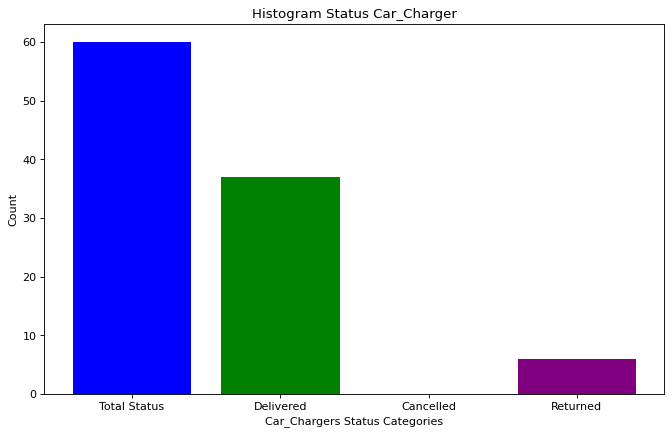

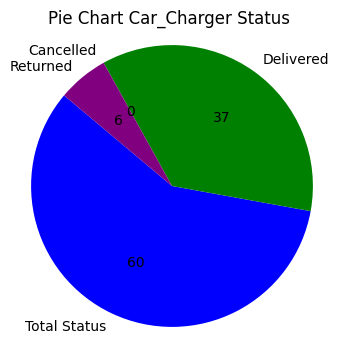

In [ ]:
car_chargers = data[data['Product Category'] == 'Car Chargers']['Status']
car_chargers['Status'] = data[data['Product Category'] == 'Car Chargers']['Status']
#wireless_earbirds

total_status_counts = car_chargers['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(car_chargers), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Car_Chargers Status Categories')
plt.ylabel('Count')
plt.title('Histogram Status Car_Charger')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart Car_Charger Status ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

**Wireless Chargers**

<ipython-input-39-1c5e512cf1e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wireless_chargers['Status'] = data[data['Product Category'] == 'Wireless Chargers']['Status']


(-1.0999984140545431,
 1.099999909472447,
 -1.099998706876456,
 1.0999938814299557)

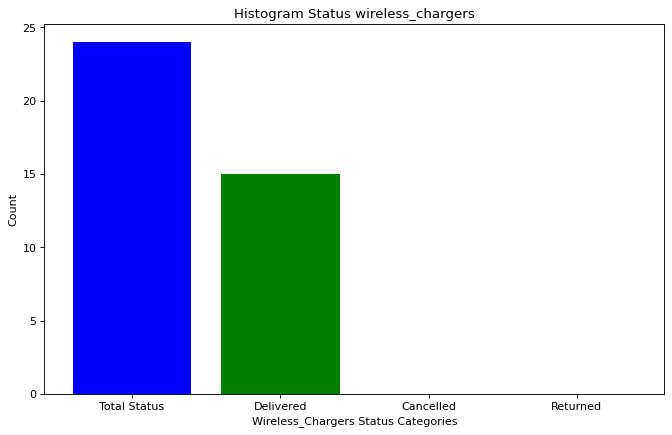

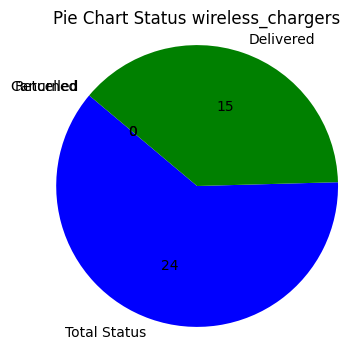

In [ ]:
wireless_chargers = data[data['Product Category'] == 'Wireless Chargers']['Status']
wireless_chargers['Status'] = data[data['Product Category'] == 'Wireless Chargers']['Status']
#wireless_earbirds

total_status_counts = wireless_chargers['Status'].value_counts()
delivered_count = total_status_counts.get('delivered', 0)
cancelled_count = total_status_counts.get('cancelled', 0)
returned_count = total_status_counts.get('returned', 0)

categories = ['Total Status', 'Delivered', 'Cancelled', 'Returned']
counts = [len(wireless_chargers), delivered_count, cancelled_count, returned_count]

plt.figure(figsize=(10, 6), dpi=80)
bars = plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Wireless_Chargers Status Categories')
plt.ylabel('Count')
plt.title('Histogram Status wireless_chargers')

# Create a pie chart with count values
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, startangle=140, colors=['blue','green', 'red', 'purple'],
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))  # Display counts instead of percentages
plt.title('Pie Chart Status wireless_chargers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()